In [149]:
import pandas as pd
import numpy as np

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
#Почему пользователи не заканчивают курс до конца?
#Как предсказать, что пользователи бросят наш курс?
#Какими основными харктеристиками обладают пользователи, которые заканчивают курс, и те, которые не заканчивают 
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip', compression ='zip')
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip', compression ='zip')

In [152]:
df.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [153]:
#Проверить, что данные, которые пришли, соответствуют заявленным

In [154]:
list(df)

['step_id', 'timestamp', 'action', 'user_id']

In [155]:
df.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [156]:
df['date'] = pd.to_datetime(df.timestamp, unit='s')

In [157]:
df

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30


In [158]:
df.date.min()

Timestamp('2015-06-15 04:00:48')

In [159]:
df['day'] = df.date.dt.date

In [160]:
df

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


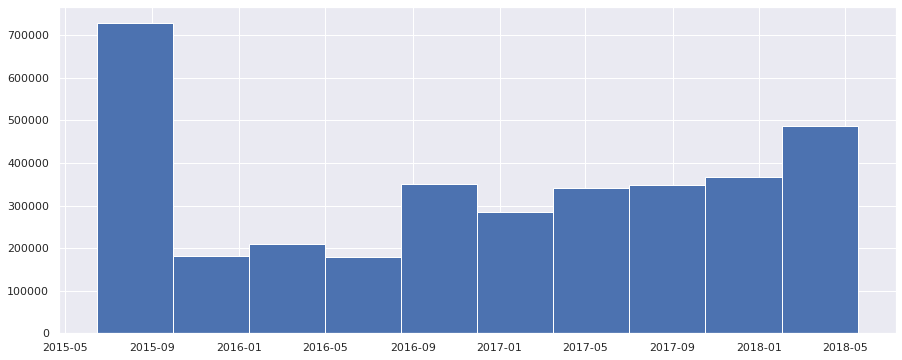

In [161]:
df.day.hist()
sns.set(rc = {'figure.figsize': (15,6)})

In [162]:
#Сколько было уникальных пользователей в день? 

<AxesSubplot:xlabel='day'>

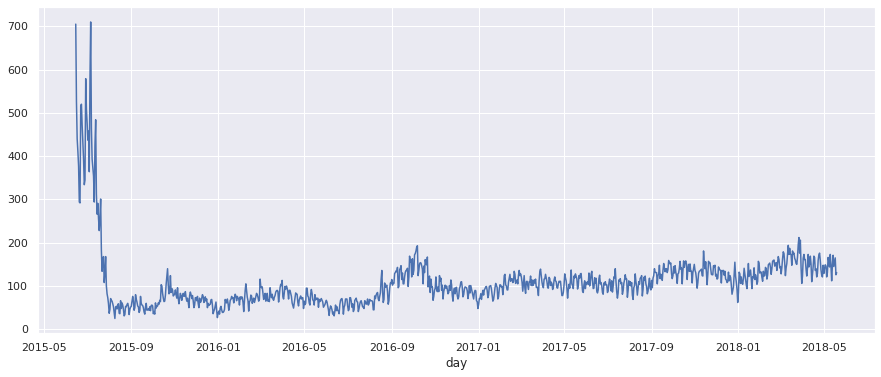

In [163]:
df.groupby('day').user_id.nunique().plot()

In [164]:
#Число пройденных степов для каждого пользователя

array([[<AxesSubplot:title={'center':'step_id'}>]], dtype=object)

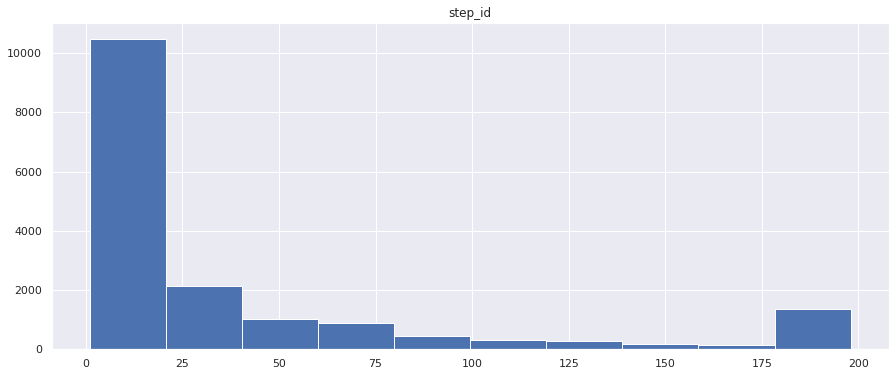

In [165]:
df.loc[df.action == 'passed'].groupby('user_id').agg({'step_id': 'nunique'}).hist()

In [166]:
df
max_timestamp = df.timestamp.max()

In [277]:
#Для случая passed >= 0
users_events_data = pd.pivot_table(index = 'user_id', columns = 'action', values = 'step_id', aggfunc = 'count', fill_value=0, data = df).reset_index()

In [168]:
#Хотим получить распределение количества дней жду правильными решениями
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip',compression ='zip')

In [169]:
submissions_data.sort_values('user_id').head()

,step_id,timestamp,submission_status,user_id
506854,32929,1514383420,correct,2
506853,32812,1514383485,correct,2
114959,33351,1444566227,correct,3
114943,32175,1441446255,wrong,3
114944,32175,1441446271,correct,3


In [170]:
submissions_data['day'] = pd.to_datetime(submissions_data.timestamp, unit='s').dt.date
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')

In [171]:
count_users = submissions_data.user_id.nunique()
count_steps = submissions_data.step_id.nunique()
submissions_data

,step_id,timestamp,submission_status,user_id,day,date
0,31971,1434349275,correct,15853,2015-06-15,2015-06-15 06:21:15
1,31972,1434348300,correct,15853,2015-06-15,2015-06-15 06:05:00
2,31972,1478852149,wrong,15853,2016-11-11,2016-11-11 08:15:49
3,31972,1478852164,correct,15853,2016-11-11,2016-11-11 08:16:04
4,31976,1434348123,wrong,15853,2015-06-15,2015-06-15 06:02:03
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05,2017-08-05 15:29:19
509100,120745,1503059927,correct,13177,2017-08-18,2017-08-18 12:38:47
509101,120745,1506348153,wrong,15253,2017-09-25,2017-09-25 14:02:33
509102,120745,1523035316,wrong,1424,2018-04-06,2018-04-06 17:21:56


In [172]:
pd.pivot_table(index = 'user_id', columns = 'submission_status', data = submissions_data, values = 'step_id', aggfunc = 'nunique', fill_value = 0).reset_index()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,12
2,5,2,1
3,8,9,7
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,29,6
9938,26797,2,0


14.066903935185184

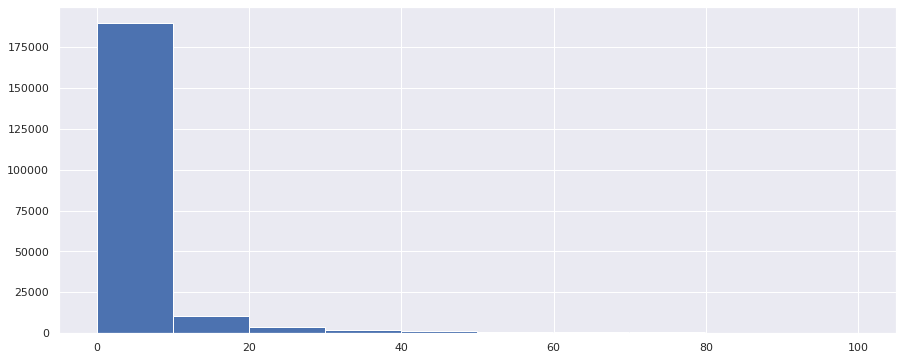

In [173]:
sub_data_new = submissions_data[submissions_data.submission_status == 'correct'].groupby(['user_id', 'step_id']).agg({'timestamp':'max'}).reset_index()
sub_data_new
sub_data_new['range'] = abs(\
                            submissions_data[submissions_data.submission_status == 'correct']. \
                            groupby(['user_id', 'step_id']).agg({'timestamp':'max'}).reset_index().timestamp \
                            - \
                            submissions_data[submissions_data.submission_status == 'correct']. \
                            groupby(['user_id', 'step_id']).agg({'timestamp':'max'}).groupby('user_id').\
                            agg({'timestamp':'shift'}).reset_index().timestamp\
                           )
sub_data_new['prev_time_step']=submissions_data[submissions_data.submission_status == 'correct']. \
                            groupby(['user_id', 'step_id']).agg({'timestamp':'max'}).groupby('user_id').\
                            agg({'timestamp':'shift'}).reset_index().timestamp
sub_data_new['range'] = sub_data_new['range'].fillna(0)/3600/24
sub_data_new[sub_data_new.range < 100].range.hist()
sub_data_new[0<sub_data_new.range].range.quantile(0.90)

In [174]:
sub_data_new

,user_id,step_id,timestamp,range,prev_time_step
0,2,32812,1514383485,0.000000,NaN
1,2,32929,1514383420,0.000752,1.514383e+09
2,3,31971,1441259266,0.000000,NaN
3,3,31972,1441258743,0.006053,1.441259e+09
4,3,31976,1441258564,0.002072,1.441259e+09
...,...,...,...,...,...
216455,26794,120745,1495290798,186.156516,1.511375e+09
216456,26797,32812,1508425828,0.000000,NaN
216457,26797,32929,1508425367,0.005336,1.508426e+09
216458,26798,32812,1520978070,0.000000,NaN


In [175]:
sub_data_new['max_timestamp'] = max_timestamp
sub_data_new_step = sub_data_new.groupby('user_id').agg({'step_id':'nunique'}).reset_index()
query1 = list(sub_data_new_step[sub_data_new_step.step_id < count_steps].user_id)
len(query1)

9220

In [176]:
sub_data_new_timestamp = sub_data_new[sub_data_new.user_id.isin(query1)].groupby('user_id').agg({'timestamp': 'max'}).reset_index()
sub_data_new_timestamp['range_to_last'] = (max_timestamp - sub_data_new_timestamp.timestamp)/60/60/24
sub_data_new_timestamp.sort_values('range_to_last')

,user_id,timestamp,range_to_last
6687,19410,1526771227,0.018333
4042,11677,1526769326,0.040336
120,364,1526767682,0.059363
741,2058,1526767580,0.060544
8427,24555,1526766891,0.068519
...,...,...,...
5520,15976,1434346880,1069.744572
8056,23474,1434346734,1069.746262
3595,10351,1434346302,1069.751262
5637,16293,1434344145,1069.776227


In [301]:
sub_data_new_timestamp[sub_data_new_timestamp.range_to_last <= 30].user_id.count()/count_users

0.0517102615694165

In [189]:
#Другой способ

In [259]:
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip',compression ='zip')

In [260]:
submissions_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [261]:
events_data['day'] = pd.to_datetime(events_data.timestamp, unit = 's').dt.date
events_data

,step_id,timestamp,action,user_id,day,is_gone_user
0,32815,1434340848,viewed,17632,2015-06-15,True
1,32815,1434340848,passed,17632,2015-06-15,True
2,32815,1434340848,discovered,17632,2015-06-15,True
3,32811,1434340895,discovered,17632,2015-06-15,True
4,32811,1434340895,viewed,17632,2015-06-15,True
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19,NaN
3480699,32815,1526772750,viewed,5198,2018-05-19,NaN
3480700,32815,1526772750,discovered,5198,2018-05-19,NaN
3480701,32815,1526772750,passed,5198,2018-05-19,NaN


In [262]:
user_scores = submissions_data.pivot_table(index = 'user_id', columns = 'submission_status', values = 'step_id', aggfunc = 'count', fill_value = 0).reset_index()
user_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [263]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(['user_id', 'day']).\
groupby('user_id').timestamp.apply(list).apply(np.diff).values

In [264]:
gap_data = pd.Series(np.concatenate(gap_data, axis = 0))

In [265]:
gap_data = gap_data/60/60/24

In [266]:
gap_data.quantile(0.90)

18.325995370370407

In [267]:
max_date = events_data.timestamp.max()

In [278]:
users_data = events_data.groupby('user_id', as_index =  False).agg({'timestamp':'max'}).rename(columns = {'timestamp':'last_timestamp'})
users_data
users_data['is_gone_user'] = max_date - users_data.last_timestamp > 30*24*60*60
users_data

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [279]:
users_data = users_data.merge(user_scores, how = 'outer').fillna(0)

In [280]:
users_data = users_data.merge(users_events_data, how = 'outer')

In [283]:
users_days = events_data.groupby('user_id').day.nunique()

In [288]:
users_days = users_days.to_frame().reset_index()

In [289]:
users_data = users_data.merge(users_days, how = 'outer')

In [290]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [292]:
users_data.user_id.nunique()

19234

In [293]:
events_data.user_id.nunique()

19234

In [296]:
users_data['passed_course'] = users_data['passed'] > 170
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [298]:
1425/17809*100

8.001572238755687